## SET UP

In [1526]:
import matplotlib.pyplot as plt

In [1527]:
import numpy as np

In [1528]:
import pandas as pd

In [1529]:
data = pd.read_csv("DOC000.csv")

In [1530]:
data.describe()

,Time,Inside-Temp,Humidity,Red,Green,Blue,Out-Temp,Out1-Temp,Pressure,Depth,Altitude
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,14.000000,22.048148,55.040741,343.407407,329.148148,163.370370,20.672222,21.588519,1000.362963,-0.129630,107.787037
std,7.937254,0.231002,1.300373,220.928854,189.607226,141.090301,0.027919,0.003620,0.323619,0.004369,2.722452
min,1.000000,21.700000,54.000000,159.000000,141.000000,61.000000,20.630000,21.580000,999.600000,-0.140000,103.270000
25%,7.500000,21.850000,54.100000,166.500000,152.000000,68.000000,20.630000,21.590000,1000.150000,-0.130000,105.790000
50%,14.000000,22.000000,54.500000,348.000000,338.000000,148.000000,20.690000,21.590000,1000.300000,-0.130000,108.320000
75%,20.500000,22.250000,55.500000,358.000000,361.000000,174.500000,20.690000,21.590000,1000.600000,-0.130000,109.580000
max,27.000000,22.400000,59.300000,1250.000000,889.000000,670.000000,20.690000,21.590000,1000.900000,-0.120000,114.200000


## Restrictions--Data Normalizing  (Not RGB)

In [1531]:
data = data[data["Inside-Temp"] != -999]

In [1532]:
data = data[data["Out-Temp"] != 999]

In [1533]:
data.describe()

,Time,Inside-Temp,Humidity,Red,Green,Blue,Out-Temp,Out1-Temp,Pressure,Depth,Altitude
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,14.000000,22.048148,55.040741,343.407407,329.148148,163.370370,20.672222,21.588519,1000.362963,-0.129630,107.787037
std,7.937254,0.231002,1.300373,220.928854,189.607226,141.090301,0.027919,0.003620,0.323619,0.004369,2.722452
min,1.000000,21.700000,54.000000,159.000000,141.000000,61.000000,20.630000,21.580000,999.600000,-0.140000,103.270000
25%,7.500000,21.850000,54.100000,166.500000,152.000000,68.000000,20.630000,21.590000,1000.150000,-0.130000,105.790000
50%,14.000000,22.000000,54.500000,348.000000,338.000000,148.000000,20.690000,21.590000,1000.300000,-0.130000,108.320000
75%,20.500000,22.250000,55.500000,358.000000,361.000000,174.500000,20.690000,21.590000,1000.600000,-0.130000,109.580000
max,27.000000,22.400000,59.300000,1250.000000,889.000000,670.000000,20.690000,21.590000,1000.900000,-0.120000,114.200000


## Data Time

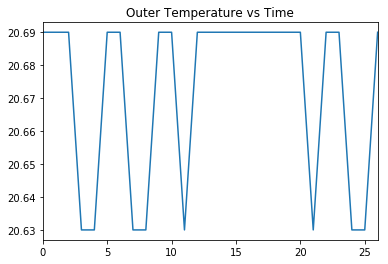

In [1534]:
data["Out-Temp"].plot(title=("Outer Temperature vs Time"))

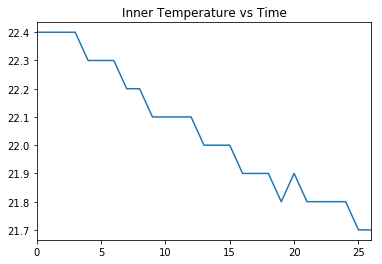

In [1535]:
data["Inside-Temp"].plot(x=data["Time"],title=("Inner Temperature vs Time"))

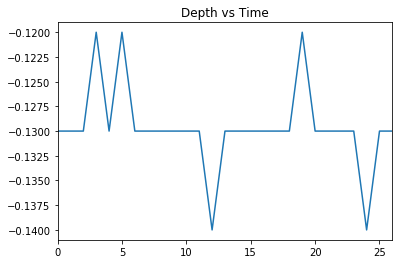

In [1536]:
data["Depth"].plot(x=data["Time"],title=("Depth vs Time"))

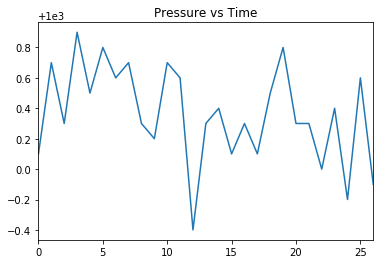

In [1537]:
data["Pressure"].plot(x=data["Time"],title=("Pressure vs Time"))

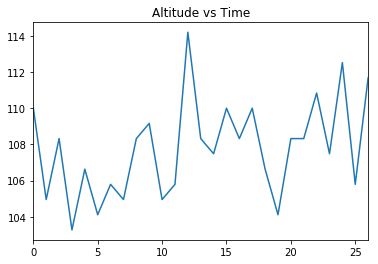

In [1538]:
data["Altitude"].plot(x=data["Time"],title=("Altitude vs Time"))

In [1539]:
dataRGB = data.loc[:,["Red","Green","Blue"]]

In [1540]:
dataRGB['Red'].values[dataRGB['Red'] > 1020] = 1020

In [1541]:
dataRGB['Green'].values[dataRGB['Green'] > 1020] = 1020

In [1542]:
dataRGB['Blue'].values[dataRGB['Blue'] > 1020] = 1020

In [1543]:
dataRGBdiv4 = dataRGB.loc[:,["Red","Green","Blue"]]

In [1544]:
dataRGBdiv4 = (dataRGBdiv4 - (dataRGBdiv4 % 4))/4

In [1545]:
dataRGB = dataRGBdiv4.astype(int)

In [1546]:
subset = dataRGB[['Red', 'Green', 'Blue']]


In [1547]:
tuples = []

In [1548]:
tuples = [tuple(x) for x in subset.values]

In [1549]:
dataRGB = dataRGB[dataRGB["Red"] > 0]

In [1550]:
dataRGB = dataRGB[dataRGB["Green"] > 0]

In [1551]:
dataRGB = dataRGB[dataRGB["Blue"] > 0]

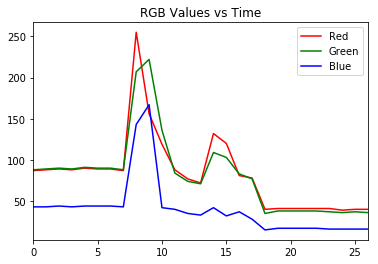

In [1552]:
dataRGB.plot(color = ['r','g','b'], title=("RGB Values vs Time"))

In [1553]:
#tupleDF = pd.Series([(elem1, elem2, elem3) for elem1, elem2, elem3 in tuples])

In [1564]:
dataRGBcombo = dataRGB["Red"]+dataRGB["Green"]+dataRGB["Blue"]

In [1565]:
dataRGBcombo = dataRGBcombo[1:31]

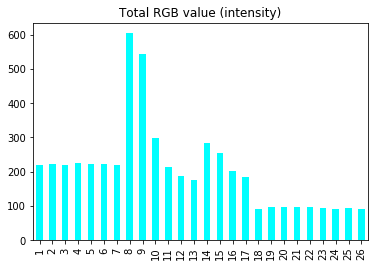

In [1566]:
dataRGBcombo.plot.bar(color=([0,1,1]),title=("Total RGB value (intensity)"))

In [1567]:
hex = []
for i in range(len(tuples)):
    a = '#%02x%02x%02x' % tuples[i]
    hex.append(a)


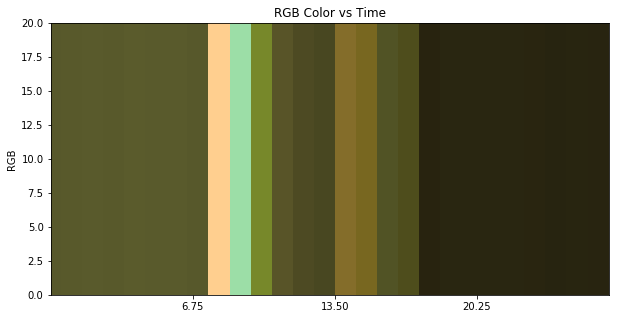

In [1559]:
pos = len(tuples)
barWidth = 1 
fig, ax = plt.subplots(figsize=(10,5))
i = 0 
while (i < pos):
    plt.bar((i), 20, width=barWidth, alpha=1, color=(hex[i])) 
    i = i + 1

ax.set_ylabel('RGB')
ax.set_title('RGB Color vs Time')
ax.set_xticks([len(tuples)/4,len(tuples)/2,(3*len(tuples)/4)])

plt.xlim([0,len(tuples)-.5])
plt.ylim([0,20])

plt.show()